In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import pathlib

In [15]:
day = '2024-01-05'

In [16]:
pathlib.Path('./Picture/V1-'+day).mkdir(parents=True, exist_ok=True)

In [17]:
result = pd.read_csv('./Results/'+day+'/Result-'+day+'.csv')
resultLeNet5 = pd.read_csv('./Results/'+day+'/ResultLeNet5-'+day+'.csv')
resultAlexNet = pd.read_csv('./Results/'+day+'/ResultAlexNet-'+day+'.csv')
resultMobileNet = pd.read_csv('./Results/'+day+'/ResultMobileNet-'+day+'.csv')

In [18]:
res = confusion_matrix(result['test'], result['predict'])
resLeNet5 = confusion_matrix(resultLeNet5['test'], resultLeNet5['predict'])
resAlexNet = confusion_matrix(resultAlexNet['test'], resultAlexNet['predict'])
resMobileNet = confusion_matrix(resultMobileNet['test'], resultMobileNet['predict'])

In [19]:
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge','Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

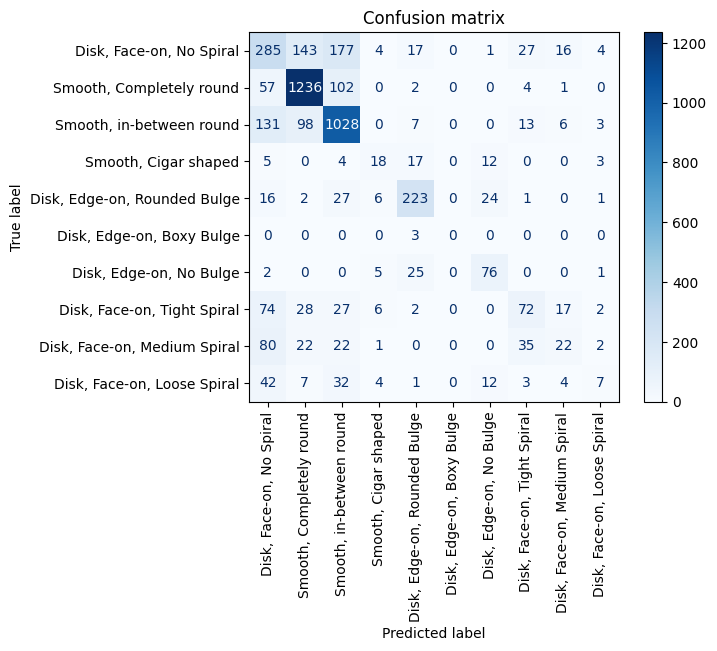

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=res, display_labels=features)
disp.plot(xticks_rotation=90,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.savefig('./Picture/'+day+'/ConfusionMatrix-'+day+'.jpeg', dpi = 900, bbox_inches = 'tight')
plt.show()

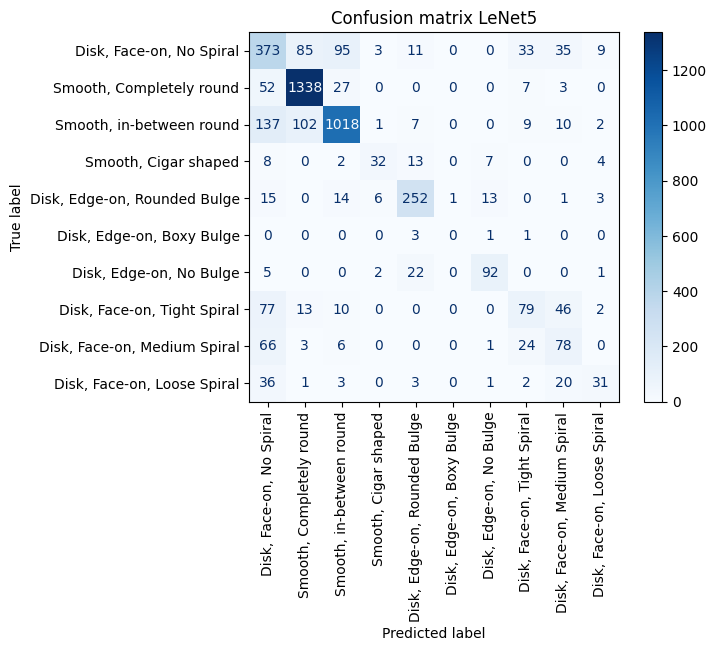

In [21]:
dispLeNet5 = ConfusionMatrixDisplay(confusion_matrix=resLeNet5, display_labels=features)
dispLeNet5.plot(xticks_rotation=90,cmap=plt.cm.Blues)
plt.title('Confusion matrix LeNet5')
plt.savefig('./Picture/'+day+'/ConfusionMatrixLeNet5-'+day+'.jpeg', dpi = 900, bbox_inches='tight')
plt.show()

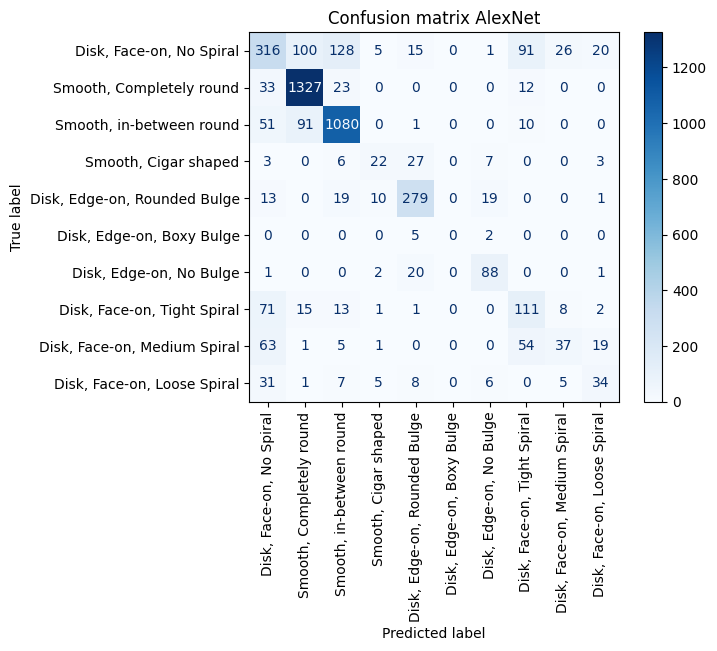

In [22]:
dispAlexNet = ConfusionMatrixDisplay(confusion_matrix=resAlexNet, display_labels=features)
dispAlexNet.plot(xticks_rotation=90,cmap=plt.cm.Blues)
plt.title('Confusion matrix AlexNet')
plt.savefig('./Picture/'+day+'/ConfusionMatrixAlexNet-'+day+'.jpeg', dpi = 900, bbox_inches='tight')
plt.show()

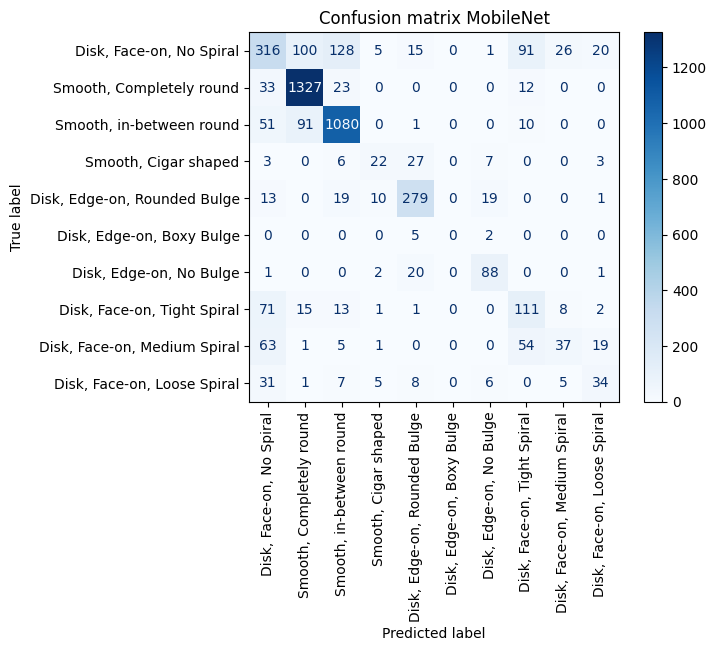

In [23]:
dispMobileNet = ConfusionMatrixDisplay(confusion_matrix=resMobileNet, display_labels=features)
dispAlexNet.plot(xticks_rotation=90,cmap=plt.cm.Blues)
plt.title('Confusion matrix MobileNet')
plt.savefig('./Picture/'+day+'/ConfusionMatrixMobileNet-'+day+'.jpeg', dpi = 900, bbox_inches='tight')
plt.show()

In [24]:
acc = accuracy_score(result['test'], result['predict'])
accLeNet5 = accuracy_score(resultLeNet5['test'], resultLeNet5['predict'])
accAlexNet = accuracy_score(resultAlexNet['test'], resultAlexNet['predict'])
accMobileNet = accuracy_score(resultMobileNet['test'], resultMobileNet['predict'])
accuracies = {'DCC':acc, 'LeNet5':accLeNet5, 'AlexNet':accAlexNet, 'MobileNet':accMobileNet}

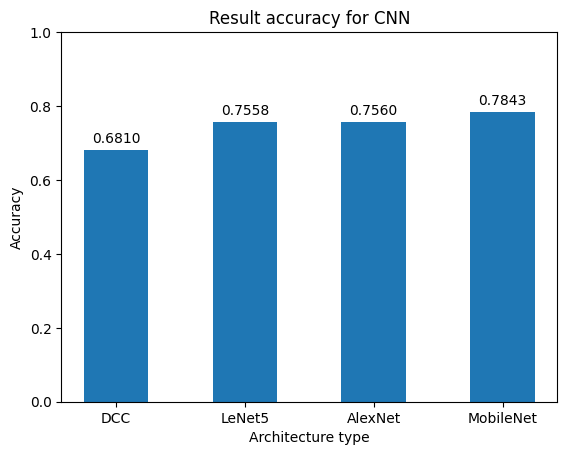

In [25]:
courses = list(accuracies.keys())
values = list(accuracies.values())
plt.bar(courses,values,width=0.5,label='y')
plt.ylim(0,1)
plt.xlabel("Architecture type")
plt.ylabel("Accuracy")
plt.title("Result accuracy for CNN")
for index, value  in enumerate(values):
    plt.text(index,(value+0.02),'{:0.4f}'.format(value),ha='center')
plt.savefig('./Picture/'+day+'/Accuracy-'+day+'.jpeg', dpi = 900, bbox_inches='tight')
plt.show()